## Saving and Loading Models

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

### Making up some data

In [4]:
x_data = np.linspace(0, 10, 10000)

In [6]:
np.random.seed(3)
noise = np.random.randn(len(x_data))*3
#noise

In [7]:
y_label = x_data*4.5+noise

In [8]:
np.random.seed(3)
data_sample = pd.DataFrame(data=np.concatenate((np.reshape(x_data, (-1, 1)), np.reshape(y_label, (-1, 1))), axis = 1), columns=['x_col', 'y_col']).sample(200, replace=True)


In [6]:
data_sample[:3]

,x_col,y_col
5994,5.994599,31.255681
1688,1.688169,7.311321
9859,9.859986,45.783627


In [9]:
x_data = pd.DataFrame(data=x_data, columns=['x_col'])
y_label = pd.DataFrame(data=y_label, columns=['y_col'])


In [8]:
x_data.shape, y_label.shape, type(y_label['y_col'])

((10000, 1), (10000, 1), pandas.core.series.Series)

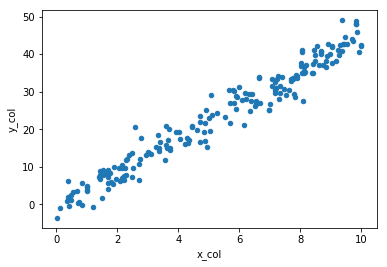

In [9]:
#plt.plot(x_data, y_label, '.')
data_sample.plot(kind='scatter', x='x_col', y='y_col')


## Set up estimator

In [10]:
x_col = tf.feature_column.numeric_column('x_col')
feat_cols = [x_col]

In [14]:
#be careful that y should not be dataframe, but series
input_func = tf.estimator.inputs.pandas_input_fn(x=x_data, y=y_label['y_col'], batch_size=10, num_epochs=2, shuffle=True)
#tf.identity(input_func, name='input_node')


In [17]:
lin_model = tf.estimator.LinearRegressor(feature_columns=feat_cols, model_dir='./model/linear_regressor')
#tf.identity(lin_model, name='model_node')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': './model/linear_regressor', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0xb3e06c4e0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [18]:
lin_model.train(input_fn=input_func)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./model/linear_regressor/model.ckpt-2000
Instructions for updating:
Use standard file utilities to get mtimes.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 2000 into ./model/linear_regressor/model.ckpt.
INFO:tensorflow:loss = 111.636765, step = 2001
INFO:tensorflow:global_step/sec: 142.592
INFO:tensorflow:loss = 69.3559, step = 2101 (0.703 sec)
INFO:tensorflow:global_step/sec: 338.645
INFO:tensorflow:loss = 84.55602, step = 2201 (0.296 s

### Evaluate

In [3]:
x_col = tf.feature_column.numeric_column('x_col')
feat_cols = [x_col]

In [10]:
input_func = tf.estimator.inputs.pandas_input_fn(x=data_sample, batch_size=10, num_epochs=1, shuffle=False)


In [244]:
pred = list(lin_model.predict(input_func))

INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from ./model/model.ckpt-2000


INFO:tensorflow:Restoring parameters from ./model/model.ckpt-2000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


In [245]:
predictions = [i['predictions'] for i in pred]

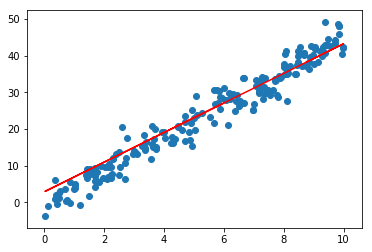

In [246]:
plt.plot(data_sample['x_col'], predictions, 'r')
plt.scatter(data_sample['x_col'], data_sample['y_col'])


## Loading the model

In [6]:
x_col = tf.feature_column.numeric_column('x_col')
feat_cols = [x_col]
input_func = tf.estimator.inputs.pandas_input_fn(x=data_sample, batch_size=10, num_epochs=1, shuffle=False)


In [19]:
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('./model/model.ckpt-4000.meta')
    saver.restore(sess, tf.train.latest_checkpoint('./model/'))
    

OSError: File ./model/model.ckpt-4000.meta does not exist.

In [12]:
tf.reset_default_graph()
init=tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    saver = tf.train.import_meta_graph('./model/linear_regressor/model.ckpt-4000.meta')
    saver.restore(sess,tf.train.latest_checkpoint('./model/linear_regressor/'))
    graph = tf.get_default_graph()
    
    #pred = list(lin_model.predict(input_func))
    #x = graph.get_tensor_by_name('x:0')
    #pred = graph.get_tensor_by_name('outputs_node:0')

INFO:tensorflow:Restoring parameters from ./model/linear_regressor/model.ckpt-4000
